# Pymaceuticals Analysis
* As a whole, we can conclude that Capomulin yields better results towards the treatment of SCC in animal study on mice. By contrast, the other two drugs, Infubinol and Ketaprilnd, shows no significant difference from Placebo.
* The experimental group given Capomulin has the most tumor volume decrease, the least amount of matastatic sites increase, the highest survival rate in comparison with other two drugs (Infubinol and Ketaprilnd) and the placebo groups. Moreover, Capomulin group is the only one showing a decrease in tumor volume among the four.
* More experiments need to be done in terms of long term effects, high and low dose effects, etc. With current data, a preliminary conclusion can be made that Capomulin is the most promising anti-SCC drug compared with Infubinol and Ketaprilnd.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_trial = pd.merge(trial_data,mouse_data,on=None,how="left")

# Display the data table for preview
mouse_trial.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
mouse_data.head()
mouse_data.count()

Mouse ID    250
Drug        250
dtype: int64

In [3]:
trial_data.head()
trial_data.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_change = mouse_trial.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().to_frame()
# Convert to DataFrame

# Preview DataFrame
tumor_change.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_change_sem = mouse_trial.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().to_frame()
# Convert to DataFrame
tumor_change_sem = tumor_change_sem.reset_index()
# Preview DataFrame
tumor_change_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
tumor_change_transposed = tumor_change.reset_index().pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
# Preview that Reformatting worked
tumor_change_transposed.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


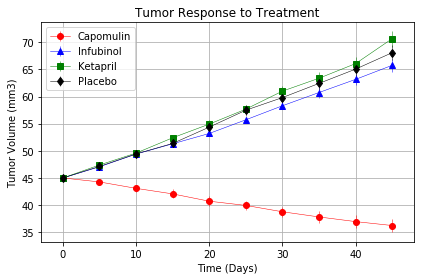

In [7]:
# Generate the Plot (with Error Bars)
x_axis = tumor_change_transposed.index
y_cap = tumor_change_transposed["Capomulin"].values
y_inf = tumor_change_transposed["Infubinol"].values
y_ket = tumor_change_transposed["Ketapril"].values
y_pla = tumor_change_transposed["Placebo"].values
sem_cap = tumor_change_sem.loc[tumor_change_sem["Drug"]=="Capomulin"]["Tumor Volume (mm3)"]
sem_inf = tumor_change_sem.loc[tumor_change_sem["Drug"]=="Infubinol"]["Tumor Volume (mm3)"]
sem_ket = tumor_change_sem.loc[tumor_change_sem["Drug"]=="Ketapril"]["Tumor Volume (mm3)"]
sem_pla = tumor_change_sem.loc[tumor_change_sem["Drug"]=="Placebo"]["Tumor Volume (mm3)"]

plt.errorbar(x_axis, y_cap, sem_cap, marker="o",c="r",label="Capomulin",linewidth=0.5)
plt.errorbar(x_axis, y_inf, sem_inf, marker="^",c="b",label="Infubinol",linewidth=0.5)
plt.errorbar(x_axis, y_ket, sem_ket, marker="s",c="g",label="Ketapril",linewidth=0.5)
plt.errorbar(x_axis, y_pla, sem_pla, marker="d",c="black",label="Placebo",linewidth=0.5)

plt.grid()
plt.xlim(min(x_axis)-3,max(x_axis)+3)
plt.ylim(min(y_cap)-3,max(y_ket)+3)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upperleft")
# Save the Figure

plt.tight_layout()
plt.savefig("images/Tumor_Response_to_Treatment.png",bbox_inches="tight")

In [8]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_change = mouse_trial.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean().to_frame()
# Convert to DataFrame

# Preview DataFrame
metastatic_change.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_change_sem = mouse_trial.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().to_frame()
# Convert to DataFrame
metastatic_change_sem = metastatic_change_sem.reset_index()
# Preview DataFrame
metastatic_change_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_change_transposed = metastatic_change.reset_index().pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
# Preview that Reformatting worked
metastatic_change_transposed.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


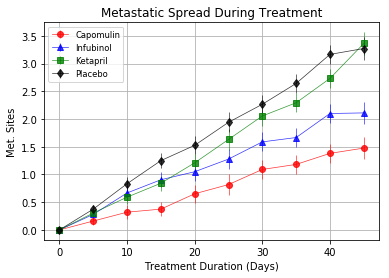

In [12]:
# Generate the Plot (with Error Bars)
x_met = metastatic_change_transposed.index

y_cap_met = metastatic_change_transposed["Capomulin"]
y_inf_met = metastatic_change_transposed["Infubinol"]
y_ket_met = metastatic_change_transposed["Ketapril"]
y_pla_met = metastatic_change_transposed["Placebo"]

z_cap_met = metastatic_change_sem.loc[metastatic_change_sem["Drug"]=="Capomulin",["Metastatic Sites"]].values
z_inf_met = metastatic_change_sem.loc[metastatic_change_sem["Drug"]=="Infubinol",["Metastatic Sites"]].values
z_ket_met = metastatic_change_sem.loc[metastatic_change_sem["Drug"]=="Ketapril",["Metastatic Sites"]].values
z_pla_met = metastatic_change_sem.loc[metastatic_change_sem["Drug"]=="Placebo",["Metastatic Sites"]].values

plt.errorbar(x_met,y_cap_met,z_cap_met,color="r",linewidth=0.7,marker="o",label="Capomulin",alpha=0.8)
plt.errorbar(x_met,y_inf_met,z_cap_met,color="b",linewidth=0.7,marker="^",label="Infubinol",alpha=0.8)
plt.errorbar(x_met,y_ket_met,z_cap_met,color="g",linewidth=0.7,marker="s",label="Ketapril",alpha=0.8)
plt.errorbar(x_met,y_pla_met,z_cap_met,color="black",linewidth=0.7,marker="d",label="Placebo",alpha=0.8)


plt.grid()
plt.legend(loc="best",fontsize="small")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# Save the Figure
plt.savefig("images/met_sites.png",bbox_inches="tight")
# Show the Figure
plt.show()

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rates = mouse_trial.groupby(["Drug","Timepoint"])["Mouse ID"].count().to_frame()
# Convert to DataFrame
survival_rates = survival_rates.reset_index()
survival_rates = survival_rates.rename(columns={"Mouse ID":"Mouse Count"})
# Preview DataFrame
survival_rates.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
survival_rates_transposed = survival_rates.reset_index().pivot(index="Timepoint",columns="Drug",values="Mouse Count")
# Preview the Data Frame
survival_rates_transposed.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


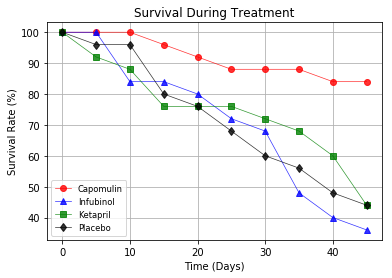

In [15]:
# Generate the Plot (Accounting for percentages)
x_sr = survival_rates_transposed.index

y_cap_sr = survival_rates_transposed["Capomulin"]/25*100
y_inf_sr = survival_rates_transposed["Infubinol"]/25*100
y_ket_sr = survival_rates_transposed["Ketapril"]/25*100
y_pla_sr = survival_rates_transposed["Placebo"]/25*100

cap_sr, = plt.plot(x_sr,y_cap_sr,marker="o",c="r",label="Capomulin",linewidth=0.7,alpha=0.8)
inf_sr, = plt.plot(x_sr,y_inf_sr,marker="^",c="b",label="Infubinol",linewidth=0.7,alpha=0.8)
ket_sr, = plt.plot(x_sr,y_ket_sr,marker="s",c="g",label="Ketapril",linewidth=0.7,alpha=0.8)
pla_sr, = plt.plot(x_sr,y_pla_sr,marker="d",c="black",label="Placebo",linewidth=0.7,alpha=0.8)

plt.grid()
plt.legend(handles=[cap_sr,inf_sr,ket_sr,pla_sr],loc="best",fontsize="small")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
# Save the Figure
plt.savefig("images/survival_rates.png",bbox_inches="tight")
# Show the Figure
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
summary = tumor_change.reset_index("Timepoint")
percent_change = (summary.loc[(summary["Timepoint"]==45)]-summary.loc[(summary["Timepoint"]==0)])/summary.loc[(summary["Timepoint"]==0)]*100
# Display the data to confirm
percent_change = percent_change.reset_index().drop(columns = ["Timepoint"]).rename(columns={"Tumor Volume (mm3)":"% Change"})
percent_change


,Drug,% Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


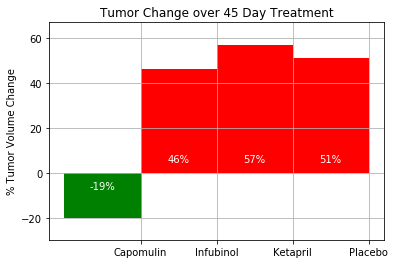

In [17]:
# Store all Relevant Percent Changes into a Tuple
bar = percent_change.loc[(percent_change["Drug"]=="Capomulin")|
                         (percent_change["Drug"]=="Infubinol")|
                         (percent_change["Drug"]=="Ketapril")|
                         (percent_change["Drug"]=="Placebo")]
x_axis = np.arange(len(bar["Drug"]))
y_axis = bar["% Change"].values
tick_loc = [value+0.5 for value in x_axis]
barlist = plt.bar(x_axis,y_axis,width=1,color="r")

# Splice the data between passing and failing drugs
barlist[0].set_color("green")

# Orient widths. Add labels, tick marks, etc. 
plt.xticks(tick_loc,bar["Drug"])
plt.ylim(min(bar["% Change"])-10,max(bar["% Change"])+10)
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change over 45 Day Treatment")
plt.grid()

# Use functions to label the percentages of changes
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        if height >0:
            plt.text(bar.get_x()+bar.get_width()/2,4,"%d%%" %int(height), ha="center",va="bottom",color="w")
        else:
            plt.text(bar.get_x()+bar.get_width()/2,-8,"%d%%" %int(height), ha="center",va="bottom",color="w")
# Call functions to implement the function calls
autolabel(barlist)

# Save the Figure
plt.savefig("images/summary_bar_graph.png",bbox_inches = "tight")

# Show the Figure
plt.show()